In [171]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import statsmodels.api as sm
import seaborn as sns
sns.set(font='IPAGothic')
import os


In [172]:
df = pd.read_csv('C:/Users/abhak/Documents/temp_forcast/temperatur.csv')
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [173]:
df['DATE'] = pd.to_datetime(df['DATE'])

df.head()


,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014-01-01,33.0,46.0,40.0,657,1756
1,2014-01-02,35.0,50.0,43.0,657,1756
2,2014-01-03,36.0,45.0,41.0,657,1757
3,2014-01-04,32.0,41.0,37.0,658,1757
4,2014-01-05,24.0,38.0,31.0,658,1758


In [174]:
df.set_index('DATE',inplace=True)
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [175]:
df.shape

(1825, 5)

In [176]:
df.dropna(inplace=True)

In [177]:
df.shape

(1821, 5)

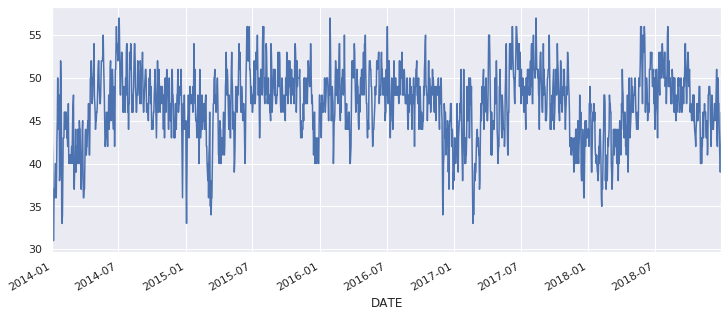

In [178]:
df['AvgTemp'].plot(figsize=(12,5))

In [179]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print("1. ADF : ",dftest[0])
    print("2. p-value: ",dftest[1])
    print("3. Num of Lags : ",dftest[2])
    print("4. Num of observations used for ADF Regression: ",dftest[3])
    print("5. Critical values : ")
    for key, val in dftest[4].items():
        print("\t",key,":",val)
ad_test(df['AvgTemp'])


1. ADF :  -6.55468012506878
2. p-value:  8.67593748019951e-09
3. Num of Lags :  12
4. Num of observations used for ADF Regression:  1808
5. Critical values : 
	 1% : -3.433972018026501
	 5% : -2.8631399192826676
	 10% : -2.5676217442756872


In [180]:
#model is stationary
#pip install pmdarima
#it was giving me error i solved it by 
#pip install pmdarima

In [181]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
suppress_warnings=True)
stepwise_fit.summary()

ModuleNotFoundError: No module named 'pmdarima'

In [182]:
print (df.shape)

(1821, 5)


In [183]:
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)


(1791, 5) (30, 5)


In [228]:
from statsmodels.tsa.arima_model import ARIMA 
model=ARIMA(train['AvgTemp'],order=(5,0,6))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                     ARMA(5, 6)   Log Likelihood               -4065.921
Method:                       css-mle   S.D. of innovations              2.339
Date:                Fri, 26 Feb 2021   AIC                           8157.843
Time:                        20:06:38   BIC                           8229.220
Sample:                             0   HQIC                          8184.198
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5435      0.820     56.753      0.000      44.936      48.151
ar.L1.AvgTemp     1.7089      0.546      3.131      0.002       0.639       2.779
ar.L2.AvgTemp    -1.5403      1.198     -1.286      0.199      -3.888       0.808
ar.L3.AvgTemp     0.7219      1.387      0.520      0.603      -1.997       3.441
ar.L4.AvgTemp     0.2749      1.008      0.273      0.785      -1.701       2.250
ar.L5.AvgTemp    -0.1782      0.282     -0.632      0.528      -0.731       0.375
ma.L1.AvgTemp    -0.8640      0.545     -1.584      0.113      -1.933       0.205
ma.L2.AvgTemp     0.7121      0.738      0.965      0.335      -0.734       2.159
ma.L3.AvgTemp    -0.0736      0.708     -0.104      0.917      -1.461       1.314
ma.L4.AvgTemp    -0.3680      0.353     -1.042      0.298      -1.060       0.324
ma.L5.AvgTemp    -0.1222      0.061     -1.999      0.046      -0.242      -0.002
ma.L6.AvgTemp    -0.0903      0.061     -1.469      0.142      -0.211       0.030
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3491           -0.9429j            1.0055           -0.1936
AR.2            0.3491           +0.9429j            1.0055            0.1936
AR.3            1.0127           -0.0000j            1.0127           -0.0000
AR.4           -2.4267           -0.0000j            2.4267           -0.5000
AR.5            2.2581           -0.0000j            2.2581           -0.0000
MA.1            1.0738           -0.0000j            1.0738           -0.0000
MA.2            0.3469           -0.9380j            1.0001           -0.1936
MA.3            0.3469           +0.9380j            1.0001            0.1936
MA.4           -1.8718           -0.0000j            1.8718           -0.5000
MA.5           -0.6241           -2.2622j            2.3467           -0.2928
MA.6           -0.6241           +2.2622j            2.3467            0.2928
-----------------------------------------------------------------------------
"""

In [229]:
start=len(train)
end=len(train)+len(test)-1
pred= model.predict(start=start,end=end)
pred.index=df.index[start:end+1]
print(pred)

DATE
2018-12-01    44.732747
2018-12-02    45.036733
2018-12-03    45.527890
2018-12-04    45.776808
2018-12-05    45.729376
2018-12-06    45.688484
2018-12-07    45.772245
2018-12-08    45.925011
2018-12-09    45.970121
2018-12-10    45.869587
2018-12-11    45.768906
2018-12-12    45.811342
2018-12-13    45.951529
2018-12-14    46.017366
2018-12-15    45.934818
2018-12-16    45.823165
2018-12-17    45.838017
2018-12-18    45.968893
2018-12-19    46.054634
2018-12-20    45.994306
2018-12-21    45.877617
2018-12-22    45.866363
2018-12-23    45.983558
2018-12-24    46.085054
2018-12-25    46.048533
2018-12-26    45.932101
2018-12-27    45.896884
2018-12-28    45.996691
2018-12-29    46.109305
2018-12-30    46.097092
dtype: float64


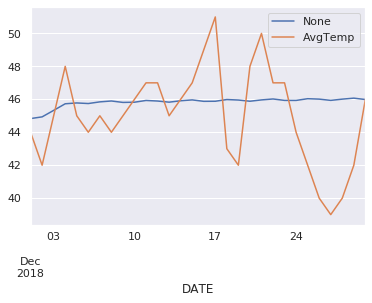

In [219]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [169]:
test['AvgTemp'].mean()

45.0

In [190]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.0005005765248685


In [231]:
model2=ARIMA(df['AvgTemp'],order=(5,0,6))
model2=model2.fit()
df.tail()


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [233]:
index_future_date=pd.date_range(start ='2018-12-30',end='2019-01-29')
#print index_future_date
pred=model2.predict(start=len(df),end=len(df)+30).rename('Arima Prediction')
#print comp_pred
pred.index=index_future_date
print(pred)

2018-12-30    46.466260
2018-12-31    46.201368
2019-01-01    45.691577
2019-01-02    45.324011
2019-01-03    45.233707
2019-01-04    45.276453
2019-01-05    45.289565
2019-01-06    45.231787
2019-01-07    45.191500
2019-01-08    45.241818
2019-01-09    45.331037
2019-01-10    45.354209
2019-01-11    45.300409
2019-01-12    45.266874
2019-01-13    45.321151
2019-01-14    45.406432
2019-01-15    45.422660
2019-01-16    45.367607
2019-01-17    45.339010
2019-01-18    45.396185
2019-01-19    45.477044
2019-01-20    45.486606
2019-01-21    45.430834
2019-01-22    45.407229
2019-01-23    45.466859
2019-01-24    45.543055
2019-01-25    45.546318
2019-01-26    45.490353
2019-01-27    45.471754
2019-01-28    45.533400
2019-01-29    45.604730
Freq: D, Name: Arima Prediction, dtype: float64


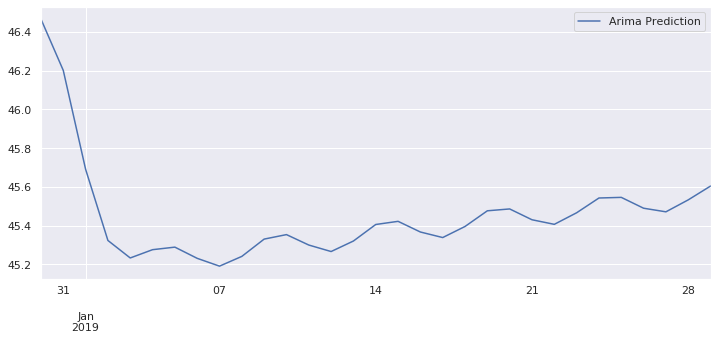

In [234]:
pred.plot(figsize=(12,5),legend=True)